In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import linalg
%matplotlib inline

In [42]:
# Default figure size
plt.rcParams['figure.figsize'] = (12,8)

In [36]:
Data = np.load('ex7faces.npz')
Data.files

['X']

### ex7faces.npz
We run PCA on face images to see how it can be used in practice for dimension reduction. The dataset ex7faces.mat contains a dataset 'X' of face images, each image is 32 × 32 in grayscale. Each row of X corresponds to one face image (a row vector of length 1024).

In [37]:
X = Data['X']
X.shape

(5000, 1024)

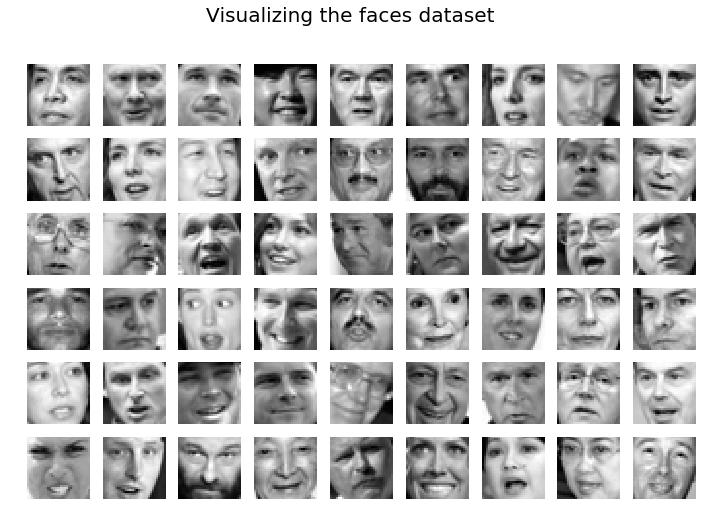

In [54]:
# Visualizing the face images
fig = plt.figure()
fig.suptitle("Visualizing the faces dataset",fontsize = 20)
indices = np.random.choice(X.shape[0],54)
for i in range(54):
    img = X[indices[i]].reshape(32,32,order ='F')
    fig.add_subplot(6,9,i+1)
    plt.imshow(img,cmap = 'gray')
    plt.axis("off")
    
plt.show()


In [6]:
# Function for mean normalizing and feature scaling 
def featureNormalize(X,mu,sigma):
    X_norm = np.apply_along_axis(np.subtract,1,X,mu)
    X_norm = np.apply_along_axis(np.divide,1,X_norm,sigma)
    return X_norm

In [7]:
# Obtaining a normalized version of X 
mu = np.mean(X,axis =0)
sigma = np.std(X,axis =0)
X_norm = featureNormalize(X,mu,sigma)

In [8]:
# Function to run PCA on the dataset
def pca(X):
    m,n = X.shape
    Sigma = (1.0/m) * ((X.T).dot(X))
    U,S,V = linalg.svd(Sigma)
    
    return U,S   

In [9]:
# Runs PCA and obtains Eigenvectors U and eigenvalues S
U,S = pca(X_norm)
U.shape

(1024, 1024)

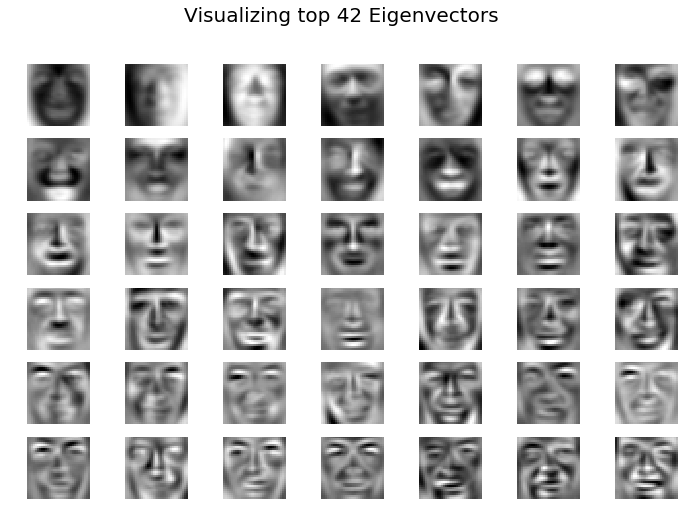

In [53]:
# Visualizing top 42 Eigenvectors
fig = plt.figure()
fig.suptitle("Visualizing top 42 Eigenvectors",fontsize = 20)
for i in range(42):
    img = U[:,i].reshape(32,32,order= 'F')
    fig.add_subplot(6,7,i+1)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
plt.show()

In [11]:
# Function computes the reduced dimension data using the top K eigenvectors in U
# The data gets projected to K dimensions
def projectData(X,U,K):
    U_reduce = U[:,:K]
    Z = X.dot(U_reduce)
    return Z

In [57]:
# Reducing the dimension of the data to only 100 using PCA, reduced dimension data is stored in Z
# Hence each face image is now described by only 100 features instead of 1024
K = 100
Z = projectData(X_norm,U,K)
Z.shape

(5000, 100)

In [13]:
# Function to reconstruct an approximation to the original dataset 
# using data that has been reduced to K dimensions
def recoverData(Z,U,K):
    U_reduce = U[:,:K]
    X_rec = Z.dot(U_reduce.T)
    return X_rec    

In [14]:
# Reconstructing the original data
X_rec = recoverData(Z,U,K)

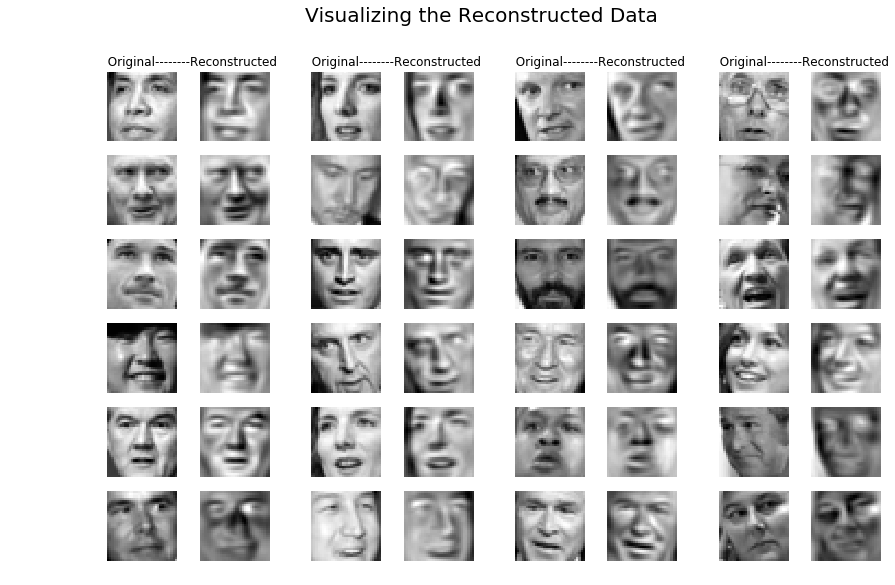

In [61]:
# Visualizing the reconstructed data
k = 0
fig = plt.figure(figsize=(14,9))
fig.suptitle("Visualizing the Reconstructed Data",fontsize = 20)
outer = gridspec.GridSpec(1,4)
for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(6,2,
            subplot_spec = outer[i])
    for j in range(12):
        ax = plt.Subplot(fig,inner[j])
        if j == 0:
            ax.set_title("                          Original--------Reconstructed")
        if j%2 == 0:
            img = X[indices[k]].reshape(32,32,order='F')
            
        else:
            img = X_rec[indices[k]].reshape(32,32,order='F')
            k = k+1
            
        ax.imshow(img,cmap='gray')
        ax.axis('off')
        fig.add_subplot(ax)

Approximate recovery of the data is performed and the original and projected face images are displayed side by side. From the reconstruction, we can observe that the general structure and appearance of the face are kept while the fine details are lost. This is a remarkable reduction of more than 10× 